데이터 전처리  
데이터의 품질을 올리는 과정  
ML 모델 훈련 데이터를 입력하기 전에 데이터를 가공  

데이터 실수화 : 컴퓨터가 이해할 수 있는 값으로 변환  
                - 범주형 자료, 텍스트 자료등 이미지 자료등을 실수로 전환
불완전한 데이터 제거 : NULL, NA, NAN 값 제거
잡음 섞인 데이터 제거 : - 값제거, 연령 데이터 중 과조하게 큰 값 제거 ex) 나이인데 400
모순된 데이터 제거 : 남성 데이터 중 주민번호가 '2'
불균형 데이터 해결 : 과소표집, 과대표집

데이터 실수화  
데이터 정제  
데이터 통합  
데이터 축소  
데이터 변환  
데이터 균형

# 데이터 실수화

범주형 자료(혈액형, 성별 등 분류 목적인 데이터 자료), 텍스트 자료 이미지 자료 등을 실수로 구성된 형태로 전환 하는 것.  


One-hot encoding  범주형 자료
범주형 데이터의 개수(집합의 크기)를 벡터의 차원으로 하고, 오직 하나의 차원에만 1을 부여함으로써 데이터를 구별하는 인코딩 방식  
표현하고 싶은 집합 원소의 인덱스에만 1의 값을, 나머지 인덱스에는 0을 부여하는 벡터 표현 방식  
  
  내가 표현하고 싶은 자료만 인덱스 1을 부여함.  데이터 전처리 1 확인 

In [2]:
# from sklearn.feature_extraction import DictVectorizer # 데이터 실수화

# v = DictVectorizer(sparse=False)
# D = [{"feature1" : 1, "feature" : 3, "feature3" : 5},
#      {"feature1" : 6, "feature2" : 0, "feature3": 8},
#      {"feature1" : 2, "feature2" : 4, "feature3" : 9}]

# v.fit_transform(D)    범주형 자료에서 수량형 자료로 변경

### Scikit - Learn의 DictVectorizer  

fit_transform() 범주형 자료에서 수량형 자료로 변경    
  
sparse = True (디폴트옵션: 메모리 공간의 낭비를 줄임)  
sparse = False (범주형 자료의 수향화 결과를 눈으로 확인 가능)

In [3]:
#범주형 자료
x=[{'city':'Paris', 'temp':1.0}, 
   {'city':'Seoul', 'temp':10.0}, 
   {'city':'Sydney', 'temp':20.0}]
x

[{'city': 'Paris', 'temp': 1.0},
 {'city': 'Seoul', 'temp': 10.0},
 {'city': 'Sydney', 'temp': 20.0}]

In [4]:
from sklearn.feature_extraction import DictVectorizer   # 각 단어의 수를 세어놓은 사전에서 BOW 인코딩 벡터를 만든다.    BOW 인코딩 백터: 원하는 자료를 제외하고는 전부 다 0을 만들고 원하는 데이터는 1로 표현하는 백터

vec = DictVectorizer(sparse=False)    
vec.fit_transform(x) #X를 범주형 수량화 자료로 변환

array([[ 1.,  0.,  0.,  1.],
       [ 0.,  1.,  0., 10.],
       [ 0.,  0.,  1., 20.]])

paris, seoul, sydeny에 각각 속한 값들을 표현하기 위해 1로 바뀜. 나머진 0으로 바뀌고.

희소행렬  
행렬의 원소 값이 대부분 0으로 채워진 행렬  
불필요한 0 값이 대부분이므로 메모리 낭비가 심함  
행렬의 크기가 클수록 연산 시 많은 시간이 소요됨  
  
CSR 형식  
메모리가 적게 들고 빠른 연산이 가능함 

In [5]:
vec1=DictVectorizer(sparse=True) #메모리를 줄임(디폴트옵션)
x1=vec1.fit_transform(x)
x1      # 실제 값이 6개 있음 3 * 4 행렬에 실제 값이 6개 있음.

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [6]:
vec1=DictVectorizer(sparse=False) #메모리를 줄임(디폴트옵션)
x1=vec1.fit_transform(x)
x1      # 실제 값이 6개 밖에 없음 3 * 4 행렬에 실제 값이 6개 있음.

array([[ 1.,  0.,  0.,  1.],
       [ 0.,  1.,  0., 10.],
       [ 0.,  0.,  1., 20.]])

데이터 실수화 - 텍스트 지료 

단어의 출현 횟수를 이용한 데이터 실수화 텍스트 자료

In [7]:
#텍스트 자료
text=['떴다 떴다 비행기 날아라 날아라',
      '높이 높이 날아라 우리 비행기',
      '내가 만든 비행기 날아라 날아라',
      '멀리 멀리 날아라 우리 비행기']
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer # 단어의 출현 횟수 

vec2 = CountVectorizer() #sparse=True(디폴트옵션)     # 단어의 출현 횟수 
t = vec2.fit_transform(text).toarray() #sparse=True를 풀고 text를 수량화 배열 자료로 변환     #toarray() 배열로 보기 # fit_transform() 범주형 자료에서 수량형 자료로 변경   즉, 텍스트 자료에서 수량형 자료로 변경함.
print(t)        # 각 행마다 단어 반복이 얼마만큼 되는지 카운트한 값 출력 
import pandas as pd
t1 = pd.DataFrame(t, columns=vec2.get_feature_names_out())        # 각각의 데이터프레임 획득 가능 # columns 열은 vec2의 featue 이름을 꺼내옴 
t1

[[2 0 0 2 0 0 1 0]
 [1 0 2 0 0 0 1 1]
 [2 1 0 0 1 0 1 0]
 [1 0 0 0 0 2 1 1]]


,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [9]:
from sklearn.feature_extraction.text import CountVectorizer # 단어의 출현 횟수 
import pandas as pd

text=['떴다 떴다 비행기 날아라 날아라',
      '높이 높이 날아라 우리 비행기',
      '내가 만든 비행기 날아라 날아라',
      '멀리 멀리 날아라 우리 비행기'
      ]

vec2 = CountVectorizer() #sparse=True(디폴트옵션)     # 단어의 출현 횟수 
t = vec2.fit_transform(text).toarray() #sparse=True를 풀고 text를 수량화 배열 자료로 변환     #toarray() 배열로 보기
print(t)

t1 = pd.DataFrame(t, columns=vec2.get_feature_names_out())        # 각각의 데이터프레임 획득 가능 # columns 열은 vec2에서 단어 나온거 출력
t1

[[2 0 0 2 0 0 1 0]
 [1 0 2 0 0 0 1 1]
 [2 1 0 0 1 0 1 0]
 [1 0 0 0 0 2 1 1]]


,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [10]:
#텍스트 자료
text = ["한 꼬마 두 꼬마 세 꼬마 인디언", 
        "네 꼬마 다섯 꼬마 여섯 꼬마 인디언",
        "일곱 꼬마 여덟 꼬마 아홉 꼬마 인디언",
        "열 꼬마 인디언 보이 열 꼬마 아홉 꼬마 여덟 꼬마 인디언",
        "일곱 꼬마 여섯 꼬마 다섯 꼬마 인디언", 
        "네 꼬마 세 꼬마 두 꼬마 인디언 한 꼬마 인디언 보이"]
from sklearn.feature_extraction.text import CountVectorizer # 단어의 출현 횟수 

vec2 = CountVectorizer() #sparse=True(디폴트옵션)     # 단어의 출현 횟수 
t = vec2.fit_transform(text).toarray() #sparse=True를 풀고 text를 수량화 배열 자료로 변환     #toarray() 배열로 보기 # fit_transform() 범주형 자료에서 수량형 자료로 변경   즉, 텍스트 자료에서 수량형 자료로 변경함.
print(t)        # 각 행마다 단어 반복이 얼마만큼 되는지 카운트한 값 출력 
import pandas as pd
t1 = pd.DataFrame(t, columns=vec2.get_feature_names_out())        # 각각의 데이터프레임 획득 가능 # columns 열은 vec2의 featue 이름을 꺼내옴 
print(t1)

[[3 0 0 0 0 0 1 0]
 [3 1 0 0 0 1 1 0]
 [3 0 0 1 1 0 1 1]
 [4 0 1 1 1 0 2 0]
 [3 1 0 0 0 1 1 1]
 [4 0 1 0 0 0 2 0]]
   꼬마  다섯  보이  아홉  여덟  여섯  인디언  일곱
0   3   0   0   0   0   0    1   0
1   3   1   0   0   0   1    1   0
2   3   0   0   1   1   0    1   1
3   4   0   1   1   1   0    2   0
4   3   1   0   0   0   1    1   1
5   4   0   1   0   0   0    2   0


TF-IDF 자주 등장하여 분석에 의미를 갖지 못하는 단어의 중요도를 낮추는 기법(ex 관사 the, a 등 을, 를 이 가)  
  
가중치 재계산: 높은 빈도의 단어가 여러 문서에 등장할 수록 가중치가 낮아짐.  
  
  n은 데이터 t는 문서 카운팅   
  값을 완화 시키려고 스무딩을 함   
    
각 데이터의 중요도가(반복 횟수)가 나오는데 이것을 기준으로 컴퓨터가 판별 할 수 있음 

데이터 벡터라이전

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer     # TF-IDF 자주 등장하여 분석에 의미를 갖지 못하는 단어의 중요도를 낮추는 기법(ex 관사 the, a 등 을, 를 이 가) 

tfid = TfidfVectorizer() #sparse=True(디폴트옵션)
x2 = tfid.fit_transform(text).toarray() #sparse=True를 풀고 text를 수량화 배열 자료로 변환
x3 = pd.DataFrame(x2, columns=tfid.get_feature_names_out())
x3

,꼬마,다섯,보이,아홉,여덟,여섯,인디언,일곱
0,0.948683,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228,0.000000
1,0.731381,0.450359,0.000000,0.000000,0.000000,0.450359,0.243794,0.000000
2,0.666872,0.000000,0.000000,0.410637,0.410637,0.000000,0.222291,0.410637
3,0.727423,0.000000,0.335942,0.335942,0.335942,0.000000,0.363711,0.000000
4,0.666872,0.410637,0.000000,0.000000,0.000000,0.410637,0.222291,0.410637
5,0.826677,0.000000,0.381780,0.000000,0.000000,0.000000,0.413339,0.000000


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer     # TF-IDF 자주 등장하여 분석에 의미를 갖지 못하는 단어의 중요도를 낮추는 기법(ex 관사 the, a 등 을, 를 이 가) 

tfid = TfidfVectorizer() #sparse=True(디폴트옵션)
x2 = tfid.fit_transform(text).toarray() #sparse=True를 풀고 text를 수량화 배열 자료로 변환
x3 = pd.DataFrame(x2, columns=tfid.get_feature_names_out())
x3

,꼬마,다섯,보이,아홉,여덟,여섯,인디언,일곱
0,0.948683,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228,0.000000
1,0.731381,0.450359,0.000000,0.000000,0.000000,0.450359,0.243794,0.000000
2,0.666872,0.000000,0.000000,0.410637,0.410637,0.000000,0.222291,0.410637
3,0.727423,0.000000,0.335942,0.335942,0.335942,0.000000,0.363711,0.000000
4,0.666872,0.410637,0.000000,0.000000,0.000000,0.410637,0.222291,0.410637
5,0.826677,0.000000,0.381780,0.000000,0.000000,0.000000,0.413339,0.000000


# 데이터 정제

결측 데이터 채우기  
결측값 채우는 방법: mean(평균), median(중앙값), mode(최빈값) 특정값으로 대체    
사이킷 런의 Simplelmputer 입력인자 값 설정

In [13]:
import numpy as np
# 결측자료
x_miss=np.array([[1,2,3,np.nan],
                 [5,np.NaN,7,8],
                 [np.nan,10,11,12],
                 [1,2,15,16],
                 [13,4,15,16]])
x_miss

array([[ 1.,  2.,  3., nan],
       [ 5., nan,  7.,  8.],
       [nan, 10., 11., 12.],
       [ 1.,  2., 15., 16.],
       [13.,  4., 15., 16.]])

In [14]:
from sklearn.impute import SimpleImputer    # 일괄적으로 결측값 데이터를 채움

im = SimpleImputer(strategy='mean') #열의 평균값으로 대체
im.fit_transform(x_miss) #열의 평균값으로 대체

array([[ 1. ,  2. ,  3. , 13. ],
       [ 5. ,  4.5,  7. ,  8. ],
       [ 5. , 10. , 11. , 12. ],
       [ 1. ,  2. , 15. , 16. ],
       [13. ,  4. , 15. , 16. ]])

In [15]:
im = SimpleImputer(strategy='median') #열의 중앙값으로 대체
im.fit_transform(x_miss) #열의 중앙값으로 대체

array([[ 1.,  2.,  3., 14.],
       [ 5.,  3.,  7.,  8.],
       [ 3., 10., 11., 12.],
       [ 1.,  2., 15., 16.],
       [13.,  4., 15., 16.]])

In [16]:
im = SimpleImputer(strategy='most_frequent')    #열의 최빈값으로 대체
im.fit_transform(x_miss) #열의 최빈값으로 대체

array([[ 1.,  2.,  3., 16.],
       [ 5.,  2.,  7.,  8.],
       [ 1., 10., 11., 12.],
       [ 1.,  2., 15., 16.],
       [13.,  4., 15., 16.]])

In [17]:
im = SimpleImputer(strategy='constant') #0으로 대체
im.fit_transform(x_miss) 

array([[ 1.,  2.,  3.,  0.],
       [ 5.,  0.,  7.,  8.],
       [ 0., 10., 11., 12.],
       [ 1.,  2., 15., 16.],
       [13.,  4., 15., 16.]])

In [18]:
im = SimpleImputer(strategy='constant', fill_value=1)   # 1로 대체
im.fit_transform(x_miss) 

array([[ 1.,  2.,  3.,  1.],
       [ 5.,  1.,  7.,  8.],
       [ 1., 10., 11., 12.],
       [ 1.,  2., 15., 16.],
       [13.,  4., 15., 16.]])

# 데이터 통합

- [데이터 다운로드](https://www.kaggle.com/c/rossmann-store-sales/data) 
- zip을 풀어서 파일을 colab에 업로드

여러 개의 데이터 파일을 하나로 합치는 과정  
Pandas의 merge() 함수 사용

In [19]:
import pandas as pd

df1=pd.read_csv("train.csv",engine='python')
print(df1.shape)        # 행은 1017209 열은 9
type(df1)

(1017209, 9)


pandas.core.frame.DataFrame

In [20]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [21]:
df2=pd.read_csv("store.csv",engine='python')
df2.shape

(1115, 10)

In [22]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [23]:
df=pd.merge(df1, df2, on='Store')     # store 기준으로 merge()  병합        # 공통의 열을 기준으로 합침
df.shape

(1017209, 18)

In [24]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [25]:
df.dtypes       # 병합된 데이터 변수의 자료 타입 확인

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [26]:
print(len(df['Store'].unique()))        #unique() 중복을 제외하고 몇 개가 있는지 확인 가능
print(len(df['Date'].unique()))         #unique() 중복을 제외하고 몇 개가 있는지 확인 가능
print(df['DayOfWeek'].value_counts())   

1115
942
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64


In [27]:
import numpy as np
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)        # to_datetime 날짜를 년도, 월, 일 등으로 분류할 떄 사용  #infer_datetime_format=True 날짜변수 분류작업 속도 높임       
df['Month']=df['Date'].dt.month
df['Quarter']=df['Date'].dt.quarter
df['Year']=df['Date'].dt.year
df['Day']=df['Date'].dt.day
df['Week']=df['Date'].dt.isocalendar().week
df['Season']=np.where(df['Month'].isin([3,4,5]),'Spring',               # np.where(A, a, b)     조건 A를 만족하면 값 a를 부여하고, 아니면 값 b를 부여하는 if-else문에 해당
                     np.where(df['Month'].isin([6,7,8]),'Summer',
                             np.where(df['Month'].isin([9,10,11]),'fall',
                                     np.where(df['Month'].isin([12,1,2]),'winter','None'))))
print(df[['Date','Year','Month','Day','Week','Quarter','Season']].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>],
       [<AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>],
       [<AxesSubplot:title={'center':'Promo2SinceWeek'}>,
        <AxesSubplot:title={'center':'Promo2SinceYear'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Quarter'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Week'}>

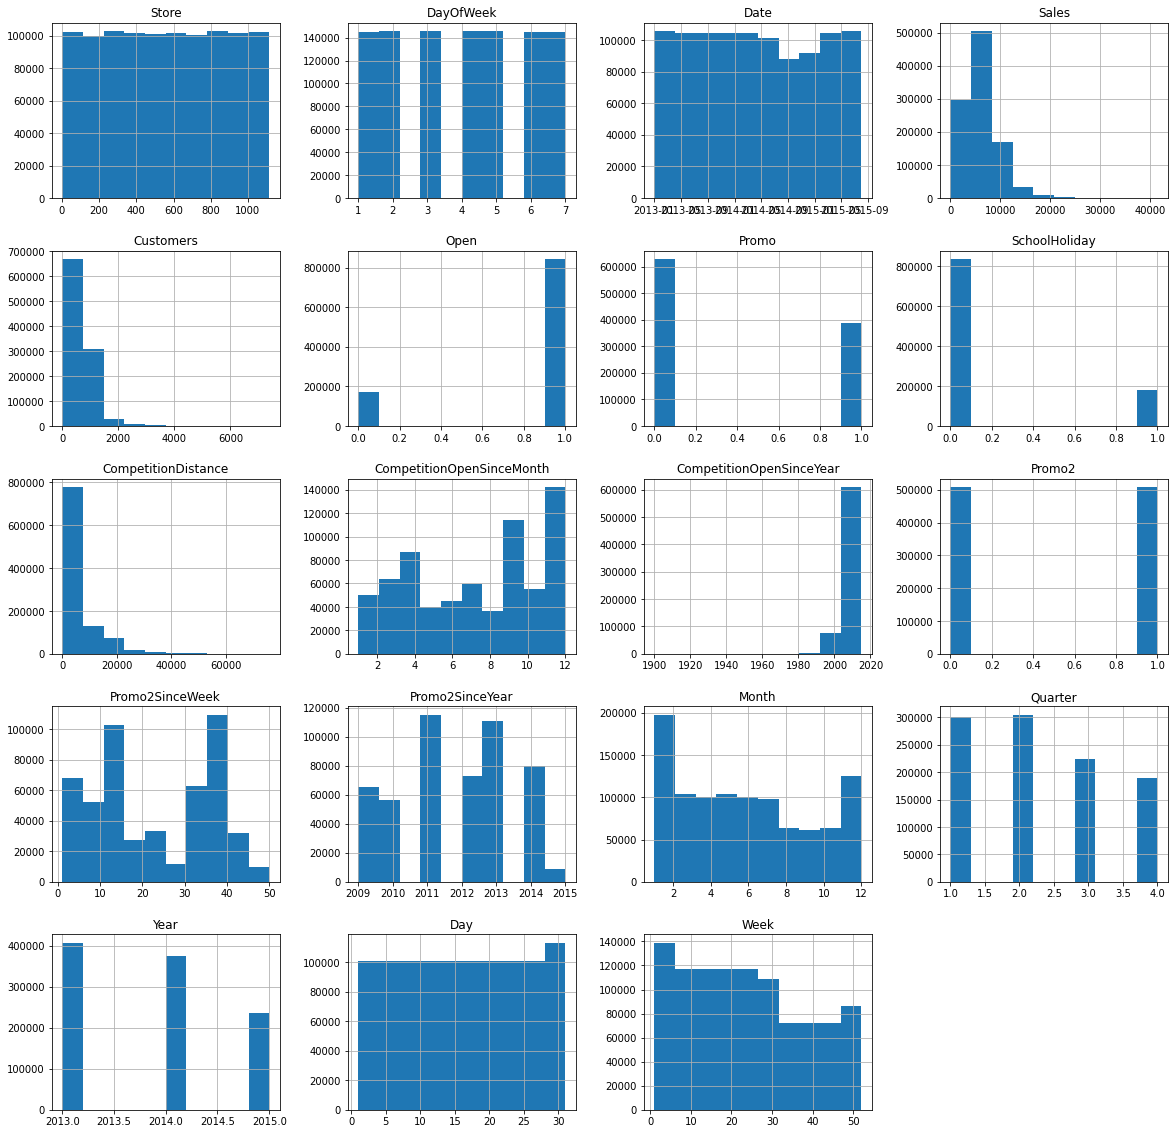

In [28]:
df.hist(figsize=(20,20))        # 히스토그램으로 확인 

자료의 결측 정도 확인  
10% 이하 : 결측치 대체 노력 필요  
30% 이상 : 해당 변수를 제거하는 편이 좋음 bias 피할 수 있음 

In [29]:
df.isnull().sum()/df.shape[0]*100       # null 값을 더하고 인덱스 값에 100을 곱한 값을 나누어줌     # isnull()  결측값이 있는가 sum을 통해서 전부 다 더한 다음 나누어줌

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

데이터 변환의 필요성  
데이터가 가진 특성 간 스케일 차이가 심하면 패턴을 찾는데 문제가 발생함.    
  
데이터 변환은 표준화와 정규화가 있음. 
x - 평균(x) / 표준편차

정규화: 이상치가 있을때의 정규화 : 정상적 관측치를 너무 작은 값으로 변환하게 되어 모형의 성능을 저하시키는 원인이 될수 있음.   
데이터의 분포가 정규분포 이거나 이상치가 있을 경우에는 포준화가 유용함  
x - min(x) / max(x) - min(x)

# 데이터 불균형  
머신런닝의 목적이 분류일 때 특정 클래스의 관측치가 다른 클래스에 비해 매우 낮게 나타나면 이러한 자료를 불균형 자료라고 함

데이터 불균형 해소기법  
과소표집, 과대표집    

일반적으로 과소표집보다 과대표집이 통계적이 유용함  


과소표집: 다수클래스의 표본을 임의로 학습데이터로부터 제거하는 것    
과대표집: 소수클래싀의 표본을 복제하여 이를 학습데이터에 추가하는 것 (SMOTE) (ADASYN)

사이킷런의 make_classification  
  
make_classification 가상의 분류모형 데이터를 생성해주는 함수   
- n_samples : 표본 데이터의 수
- n_features : 독립 변수의 수(전체 피처의 수 )
- n_informative : 독립 변수 중 존속 변수와 상관 관계가 있는 성분의 수 
- n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
- n_classes : 종속 변수의 클래스 수   
- weights : 각 클래스에 할당된 표본 수
- random_state : 난수 발생 시드

X: [n_sampels, n_feature]   크기의 배열               
            - 독립변수    
            
y: [ n_samples ] 크기의 배열   
            - 종속변수

In [30]:
from collections import Counter # Counter 항목의 개수를 셀때 사용하는 클래스. 리스트나 셋을 인자로 넘기면 각 항목을 키로 해서 개수를 알려준다.
from sklearn.datasets import make_classification    # make_classification 분균형 데이터를 분류하는 함수
from imblearn.over_sampling import SMOTE, ADASYN    # SMOTE 오버샘플링

X, y = make_classification(n_classes=3, weights=[0.03, 0.07, 0.9],   # 클래스, 가중치
                           n_features=2, #  n_features : 독립 변수의 수(전체 피처의 수 )
                           n_informative=2, # n_informative : 독립 변수 중 존속 변수와 상관 관계가 있는 성분의 수
                           n_redundant=0,    # n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
                           n_clusters_per_class=1, 
                           n_samples=200, 
                           random_state=10)      # 랜덤 시드가 10개 있다는 뜻. 매번 랜덤하게 바뀜

print('Original dataset shape %s' % Counter(y))         # 각각의 데이터 개수가 다름

Original dataset shape Counter({2: 180, 1: 14, 0: 6})


In [31]:
from collections import Counter
from sklearn.datasets import make_classification    # make_classification 분균형 데이터를 분류하는 함수
from imblearn.over_sampling import SMOTE, ADASYN

X, y = make_classification(n_classes = 3, weights = [0.03, 0.07, 0.9],   # 클래스, 가중치
                           n_features = 3, n_informative = 3, n_redundant=0,    # n_features 독립 변수의 수  n_informative : 독립 변수 중 존속 변수와 상관 관계가 있는 성분의 수
                           n_clusters_per_class=1, n_samples=200, random_state=10)      # 랜덤 시드가 10개 있다는 뜻. 매번 랜덤하게 바뀜

print('Original dataset shape %s' % Counter(y))         # 각각의 데이터 개수가 다름

Original dataset shape Counter({2: 178, 1: 15, 0: 7})


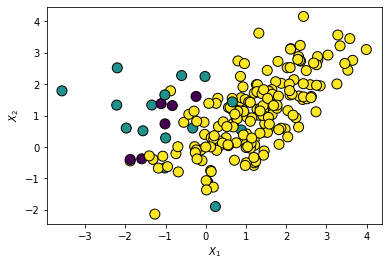

In [32]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)       # x 0번째 피처 y 1번쨰 피쳐 edgecolor="k" 테두리 색상 , linewidth 줄 크기

plt.xlabel("$X_1$")     # latex 형식으로 표현 $넣을_거$
plt.ylabel("$X_2$")
plt.show()

데이터 값이 불균형 함으로 오버샘플링을 함

In [33]:
sm = SMOTE(random_state=42)     # SMOTE() 함수 
X_res, y_res = sm.fit_resample(X, y)        # SMOTE() 함수로, X, Y 값을 각각 리셈플링함
print('Resampled dataset shape %s' % Counter(y_res))        # 각각의 데이터 개수가 똑같음.

Resampled dataset shape Counter({2: 178, 1: 178, 0: 178})


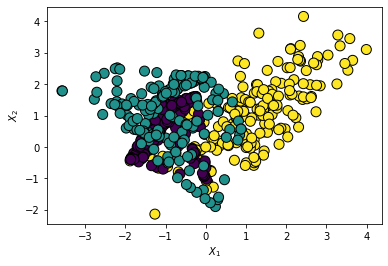

In [34]:
import matplotlib.pyplot as plt

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
            s=100, edgecolor="k", linewidth=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

다른 방법 ADASYN

In [35]:
ada=ADASYN(random_state=0)
X_syn,y_syn=ada.fit_resample(X,y)
print('Resampled dataset shape from ADASYN %s' % Counter(y_syn))        # 여기는 이전 데이터 값의 비율을 지키면서 데이터를 리셈플링함.

Resampled dataset shape from ADASYN Counter({1: 179, 2: 178, 0: 178})


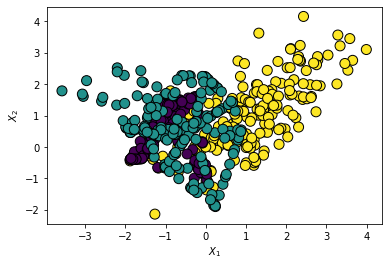

In [36]:
import matplotlib.pyplot as plt

plt.scatter(X_syn[:, 0], X_syn[:, 1], marker='o', c=y_syn,
            s=100, edgecolor="k", linewidth=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

언더샘플링

In [37]:
from imblearn.under_sampling import NearMiss

#Define the undersampling method    #버전 지정
undersample = NearMiss(version=3, n_neighbors_ver3=3)       # 데이터 언더샘플링
#Transform the dataset
X_Under, y_Under = undersample.fit_resample(X, y)     # 데이터 언더샘플링  

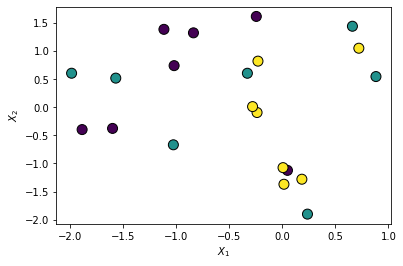

In [38]:
import matplotlib.pyplot as plt

plt.scatter(X_Under[:, 0], X_Under[:, 1], marker='o', c=y_Under,
            s=100, edgecolor="k", linewidth=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

데이터 전처리의 개념  
데이터의 품질을 올리는 과정 - 데이터의 품질은 데이터 분석의 90%를 좌우한다.

### 데이터 전처리 방법  
데이터 실수화 - 범주형 자료, 텍스트 자료, 이미지 자료 등을 실수로 구성된 형태로 전환하는 것  
데이터 정제 - 없는 데이터는 채우고, 잡음 데이터는 제거하고 모순데이터를 올바른 데이터로 교정하는 것  
데이터 통합- 여러 개의 데이터 파일을 하나로 합치는 과정  
데이터 축소  - 데이터가 과도하게 큰 경우, 분석 미치 학습에 시간이 오래걸리고 비효울적이기 때문에 데이터의 수를 줄이거나 데이터 차원을 축소하는 작업  
데이터 변환 : 표준화 및 정규화  
데이터 균형 : 특정 클래스의 관측치가 다른 클래싀에 비해 매우 낮을 경우 샘플링을 통해 클래스 비율을 맞추는 작업  (과소표집), (과대표집)      <---- 학기 말에 다시